# Statistical Power 

Power is 1-β, where β is the probability of wrongly concluding there is no effect when one actually exists. This type of error is termed Type II error. Like statistical significance, statistical power depends upon effect size and sample size. If the effect size of the intervention is large, it is possible to detect such an effect in smaller sample numbers, whereas a smaller effect size would require larger sample sizes.

Methods to increase the power of your study include:
- using more potent interventions that have bigger effects 
- increasing the size of the sample/subjects(not the best solution)
- raising the α level but only if making a Type I error is highly unlikely OR if making a type 1 error is not "as bad" as making a type 2 error

The statistical power of a hypothesis test is a function of:

* the sample size,
* the significance level 𝛼, and
* the effect size or difference between the groups we are testing

Typically accepted values for the power of a statistical test are greater than or equal to 0.80 or 80%. Studies with power less than 80% are said to be underpowered and require a reevaluation of experimental design or acquiring more samples.

### Effect size 

When we design an experiment, we want to make sure to gather enough data to be able to detect differences between our groups, should the difference exist. The effect size is a measure of the difference between the two groups we're testing. 

Cohen's d, denoted by $d$, is a _standardized_ effect size measure equal to the magnitude of the difference in sample means divided by the pooled sample standard deviation of the two samples. 
* We use standardized effect sizes so we can remove the units of the variables in the effect size.  

When testing the difference in the sample means of two samples, we use Cohen's d to measure the effect size. 

#### Class Intervention Example 

#### Cohen's d

Cohen's d is given by: 

$$ \large d = \frac{|\mu_2 - \mu_1|}{s_p},  $$

where $\mu_1$ and $\mu_2$ are the sample means for sample 1 and 2, respectively, and $s_p$ is the pooled standard deviation of the two samples. 

The pooled standard deviation $s_p$ of the two samples is given by: 

$$ \large s_p = \sqrt{\frac{\left(n_1 -1\right)s_1^2 + \left(n_2 -1\right)s_2^2 }{n_1 + n_2 - 2}}, $$

where $n_1$ and $n_2$ are the sample sizes for sample 1 and sample 2, respectively, and $s_1^2$ and $s_2^2$ are the sample variances for sample 1 and sample 2, respectively. 

In [1]:
def cohen_d(sample1, sample2):
    n1, n2 = len(sample1), len(sample2)
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    pooled_var = ((n1-1)*var1 + (n2-1)*var2)/(n1+n2-2)
    s = np.sqrt(pooled_var)
    
    mean1, mean2 = np.mean(sample1), np.mean(sample2)
    
    return np.abs(mean2-mean1)/s

Effect sizes are considered to be small, medium, or large depending on the following rule of thumb: 

||Cohen's d|
|--|--|
|small|0.2|
|medium|0.5|
|large|0.8|

Compute the effect size for the following two samples, `sample1` and `sample2`, using the function for Cohen'd written above. Is this a small, medium, or large effect size? 

In [2]:
import scipy.stats as stats
import numpy as np

np.random.seed(42) #for reproducibility
rv1 = stats.norm(loc=10, scale=1)
rv2 = stats.norm(loc=12, scale=2)

sample1 = rv1.rvs(25)
sample2 = rv2.rvs(25)

cohen_d(sample1, sample2)

1.078156931213827

> Large effect size. 

**What if the sample size was 50?**

In [3]:
np.random.seed(42) #for reproducibility

sample1 = rv1.rvs(50)
sample2 = rv2.rvs(50)

cohen_d(sample1, sample2)

1.6130691290016745

**Why did the effect size increase when we increased the sample size of our samples?**

> The pooled standard deviation of the samples decreases with increasing sample size. 


Now let's compute type II error rate using a simulation and compute power instead.

In this example, the null hypothesis is that the two samples of scores come from the same population of scores, and the alternative hypothesis is that they do not come from the same population of scores. 

**When you compute the power of a statistical test, what probability are you calculating?**

> You compute the probability that you'll reject the null hypothesis given it's false. 

**Let's run 1000 simulations and compute the power of our test.** 

Remember that $\text{power} = 1 - \beta$.  

In [4]:
# Set a random seed for reproducibility
np.random.seed(42)

# Create two instances of a normal continuous random variable, one with mean 5 and standard deviation 1,
# and another with mean 6 and standard deviation 2.
scores_population_1 = stats.norm(loc=5, scale=1)
scores_population_2 = stats.norm(loc=6, scale=2)

# Set the number of simulations to run to 1000
n_simulations = 1000

# Set the size of the samples you'll draw to 25 
n_sample_size = 25 

# You reject the null hypothesis is the p-value of the two-sided t-test is less than alpha = 0.05
alpha = 0.05

# Keep count of the number of times you reject the null hypothesis 
c = 0

# Run the simulations 
for i in range(n_simulations):
    sample1, sample2 = scores_population_1.rvs(n_sample_size), scores_population_2.rvs(n_sample_size) 
    result = stats.ttest_ind(sample1, sample2)
    
    # Keep track of the number of times you reject the null hypothesis 
    if result[1] > alpha:
        c+=1

type_2_error_rate = c/n_simulations

power = 1 - type_2_error_rate

print("Power: {}".format(power))

Power: 0.597


**If we were limited to a sample size of 10, what would be the power of our test?** 

> Run code again with `sample_size = 10`. 

In [5]:
# Set a random seed for reproducibility
np.random.seed(42)

# Create two instance of a normal continuous random variable, one with mean 5 and standard deviation 1,
# and another with mean 6 and standard deviation 2.
scores_population_1 = stats.norm(loc=5, scale=1)
scores_population_2 = stats.norm(loc=6, scale=2)

# Set the number of simulations to run to 1000
n_simulations = 1000

# Set the size of the samples you'll draw to 25 
n_sample_size = 10 

# You reject the null hypothesis is the p-value of the two-sided t-test is less than alpha = 0.05
alpha = 0.05

# Keep count of the number of times you reject the null hypothesis 
c = 0

# Run the simulations 
for i in range(n_simulations):
    sample1, sample2 = scores_population_1.rvs(n_sample_size), scores_population_2.rvs(n_sample_size) 
    result = stats.ttest_ind(sample1, sample2)
    
    # Keep track of the number of times you reject the null hypothesis 
    if result[1] > alpha:
        c+=1

type_2_error_rate = c/n_simulations

power = 1 - type_2_error_rate

print("Power: {}".format(power))

Power: 0.277


> As the sample size of our samples decreases, so does the power of the statistical test we perform.

# Power and effect size, sample size, and $\alpha$ 

The following four quantities are interrelated:
* power
* effect size
* sample size
* significance level, $\alpha$ 

Given any of these three quantities, we can determine the fourth. 

Let's explore how power depends on effect size, sample size, and significance level $\alpha$. 

The function below allows you to compute power for any `effect_size`, `sample_size` and `alpha` combination using `n_simulations` simulated tests. 

In [7]:
def get_power(effect_size, sample_size, alpha, n_simulations=1000):
    
    rv1 = stats.norm(loc=0, scale=1)
    rv2 = stats.norm(loc=effect_size, scale=1)
    
    # keep a count of the times you failed to reject the null hypothesis
    c = 0
    for i in range(n_simulations):
        sample1, sample2 = rv1.rvs(sample_size), rv2.rvs(sample_size)
        result = stats.ttest_ind(sample1, sample2)
        if result[1] > alpha:
            c+=1
            
    beta = c/n_simulations
    power = 1 - beta
    
    return power

**What happens to the power of a two-sided t-test as the sample size is changed?** 

**Create a plot to show how power changes as sample size changes.** 

Use `sample_sizes = [10, 20, 50, 100]`. 

Assume $\alpha=0.05$ and that you're want to measure an effect size equal to 0.5. 

Text(0, 0.5, 'power')

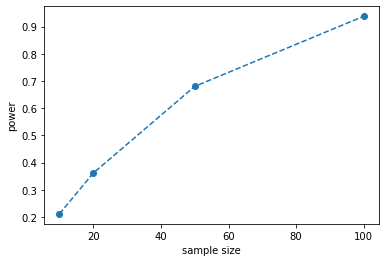

In [8]:
sample_sizes = [10, 20, 50, 100]
powers = []
for size in sample_sizes:
    powers.append(get_power(0.5, size, 0.05))

import matplotlib.pyplot as plt 
%matplotlib inline 

plt.plot(sample_sizes, powers, marker='o', ls='dashed')
plt.xlabel('sample size')
plt.ylabel('power')

> Power increases as sample size increases, all other things being the same. 

**What happens to the power of a two-sided t-test as the effect size we want to detect changes? Create a plot to show how power changes as the effect size changes.** 

Use `effect_sizes = [0.1, 0.2, 0.5, 0.8]`. 

Assume alpha=0.05 and sample_size=100. 

Text(0, 0.5, 'power')

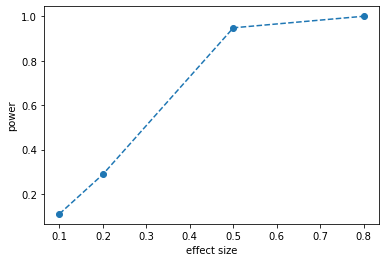

In [9]:
effect_sizes = [0.1, 0.2, 0.5, 0.8]
powers = []
for es in effect_sizes:
    powers.append(get_power(es, 100, 0.05))

plt.plot(effect_sizes, powers, marker='o', ls='dashed')
plt.xlabel('effect size')
plt.ylabel('power')

> Power increases as the effect size increases, all other things being the same. 

**What happens to the power of a statistical test as $\alpha$ changes? Create a plot to show how power changes as $\alpha$ changes.** 

Use `alphas = [0.001, 0.01, 0.05, 0.1, 0.2]`. 

Assume sample_size=100 and that you're trying to measure an effect_size = 0.5. 

Text(0, 0.5, 'power')

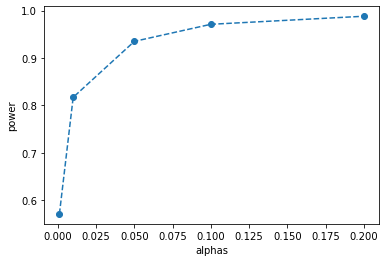

In [10]:
alphas = [0.001, 0.01, 0.05, 0.1, 0.2]
powers = []
for alpha in alphas:
    powers.append(get_power(0.5, 100, alpha))

plt.plot(alphas, powers, marker='o', ls='dashed')
plt.xlabel('alphas')
plt.ylabel('power')

> As alpha increases, power increases, all other things remaining the same.

_INSIGHT:_ If you're willing to accept making more Type I error, you decrease the Type II error of the test (increase the power of the test). 

<details>
    <summary>Q:What's an example of a situation where we want to prioritize Type 11 error over type 1 error?</summary> 
    - Detecting the presence of disease 
</details>

# Summary

* A Type I error is made when the null hypothesis is rejected given it's true. Type I error rate is denoted by $\alpha$ and is equal to the significance level of our test.  
* A Type II error is made when we fail to reject the null hypothesis given it's false. Type II error rate is denoted by $\beta$. 
* Power is the probability of rejecting the null hypothesis given it's false. $\text{power} = 1 - \beta$. 
* The statistical power of a test is determined by $\alpha$, sample size, and the effect size we're trying to measure. 
* Cohen's d is a standardized measure of the difference between two sample means. 
* We use statistical power analysis to determine the power of an already-designed experiment, or alternatively, we use statistical power analysis to determine the sample size we need to measure a given effect size in an experiment, should it exist. 